<a href="https://colab.research.google.com/github/geowongg/WorkspaceGeo/blob/main/Evaluaci%C3%B3nFinal_Georgina_Wong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creacion de histograma del momento transverso a partir de un archivo csv


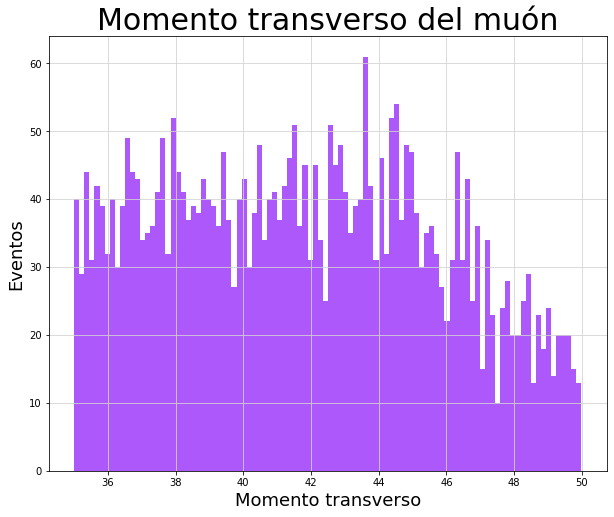

In [55]:
#Programa que grafica el momento transverso del primer muon en un rango de 35 a 50 GeV
#Autor: Georgina Wong Ovando
#Fecha: Diciembre 2, 2021

import pandas as pd #nos ayuda a leer nuestros archivos csv
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt

#datos tomados de http://opendata.cern.ch/record/5201
file = "http://opendata.cern.ch/record/5201/files/Dimuon_DoubleMu.csv"
 

#creamos una variable llamada particles la cual con ayuda del objeto pandas nos lee lo que hay dentro del archivo CSV
particles=pd.read_csv(file)#leemos el archivo csv

data= np.genfromtxt(file, delimiter=",", names=["Run","Event","type1","E1","px1","py1","pz1","pt1","eta1","phi1","Q1","type2","E2","px2","py2","pz2","pt2","eta2","phi2","Q2","M"], skip_header=1)

#HISTIOGRAMAS

#Histograma con plotly express
eventos_filtrados = data [data['pt1']>35]
eventos_filtrados = eventos_filtrados[eventos_filtrados['pt1']<50]

grafica=px.histogram(eventos_filtrados['pt1'], eventos_filtrados['pt1'], nbins=100, color_discrete_sequence=['#AC58FA'])
grafica.update_layout(title=r"Momento transverso del muon", xaxis_title=r"Momento del muon[GeV]", yaxis_title=r"Eventos")
grafica.update_layout(xaxis_range=[35,50])
grafica.update_layout(yaxis_range=[0,80])
grafica.show()

print("\n")

#Histograma con matplot lib 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.hist(eventos_filtrados["pt1"], bins = 100, color="#AC58FA")
plt.xlabel("Momento transverso", fontsize=18)
plt.ylabel("Eventos", fontsize=18)
plt.title("Momento transverso del muón" , fontsize=30)
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')

plt.show()



# Definiciones


**Media**

La media aritmética se conoce como el promedio, y esta dada por:

\begin{equation}
\bar{x}=\frac{1}{n} \sum_{i=1}^{n} x_{i}
\end{equation}

donde {x} es el promedio, y $x_{i}$ es el valor de cada $x$ (elementos) dependiendo del subíndice $i$ y $n$ es el número total de elementos


**Mediana**

Es el valor de la variable de posición central en un conjunto de datos ordenados(crecientemente o decrecientemente).
La manera más sencilla de calcularlo es considerar los elementos de manera individual, como "datos no agrupados" con dos casos, si $n$ es impar o par. En Para $n$ impar :
\begin{equation}
M_{e}=x_{\frac{(n+1)}{2}}
\end{equation}
Ya que la mediana está en la posición $\frac{n+1}{2}$ y esto después de haber ordenado
los datos (crecientemente o decrecientemente).

Cuando n es par, los dos datos que están en el centro de la muestra ocupan las posiciones $\frac{n}{2}$ y $\frac{n}{2}+1$. Entonces:
\begin{equation}
M_{e}= \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}
\end{equation}

**Moda**

Es el valor que aparece con mayor frecuencia en un conjunto de datos.

**Rango**

El Rango es el intervalo entre el valor máximo y el valor mínimo, se define como:
\begin{equation}
R=x_{n}- x_{1}
\end{equation}
Además nos permite obtener una idea de la dispersión de los datos, cuanto mayor es el rango, aún más dispersos están los datos. 

**Varianza**

Suele representarse como $\sigma^2$, es una medida de dispersión definida como valor medio del cuadrado de la desviación de dicha variable respecto a su media, de tal modo que
\begin{eqnarray}
σ^2 &=& {\frac{\sum{(\overline{x}-x)^2}}{N-1}}
\end{eqnarray}


**Desviación estándar**

Es una medida que se utiliza para cuantificar la variación o la dispersión de un conjunto de datos numéricos. Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media (también denominada el valor esperado), mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio. Las desviaciones estándar de la muestra, corresponden también a una distribución Gaussiana, cuyo centro constituye la desviación estándar del universo, $\sigma$, cuya “mejor estimación” está dada por la cantidad: 

\begin{eqnarray}
σ &=& \sqrt{\frac{\sum{(\overline{x}-x)^2}}{N-1}}
\end{eqnarray}


**Error estándar**

Admitiendo a nuestra desviación estándar de la muestra como la mejor estimación de $\sigma$, el error estándar es la desviación estándar de la distribución muestral de un estadístico muestral. Puede ser expresado como:

\begin{eqnarray}
 σ_\bar{x} &=& \frac{\sigma}{\sqrt{N}} 
\end{eqnarray}

donde $σ$ es la desviación estandar de la población y $N$ es el tamaño (número de observaciones) de la muestra




# Medidas de dispersión 

+---------+---------+-----------+--------+---------+------------+-----------------------+------------------+
|         |   Media |   Mediana |   Moda |   Rango |   Varianza |   Desviación estándar |   Error estándar |
+=========+=========+===========+========+=========+============+=======================+==================+
| Valores |  41.817 |    41.732 |  35.08 |  14.986 |      15.88 |                 3.985 |            0.067 |
+---------+---------+-----------+--------+---------+------------+-----------------------+------------------+




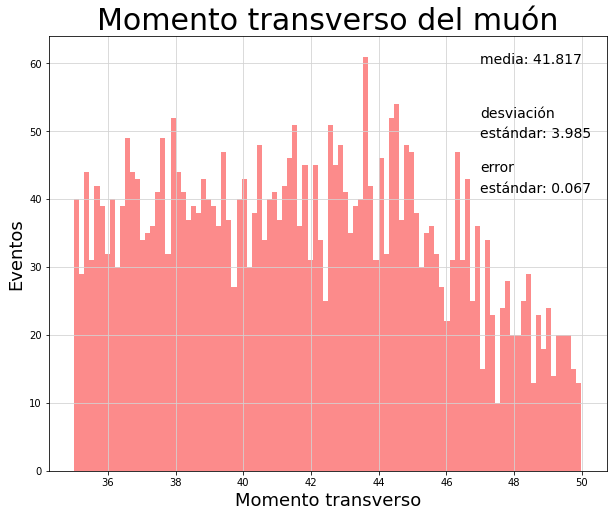

In [50]:
#Programa que calcula las medidas de dispersión estadisticas del momento transverso 
#Autor: Georgina Wong Ovando
#Fecha: Diciembre 2, 2021

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate 

file = 'https://cernbox.cern.ch/index.php/s/Ak6DnRo9QhV315Y/download'
particles = pd.read_csv(file)
particles.head()

data = np.genfromtxt(file, delimiter =",", names=["Run","Event","type1","E1","px1","py1","pz1","pt1","eta1","phi1","Q1","type2","E2","px2","py2","pz2","pt2","eta2","phi2","Q2","M"], skip_header=1)

#selección de datos con masa entre 35 a 50 GeV

eventos_filtrados = data [data['pt1']>35]
eventos_filtrados = eventos_filtrados[eventos_filtrados['pt1']<50]
 
#media
media = np.mean(eventos_filtrados['pt1']) 
#mediana
mediana = np.median(eventos_filtrados['pt1'])
#moda
moda = stats.mode(eventos_filtrados['pt1'])
#rango
rango = np.ptp(eventos_filtrados['pt1']) 
#varianza
varianza = np.var(eventos_filtrados['pt1']) 
#desviación estándar
desvEst = np.std(eventos_filtrados['pt1']) 
#error estandar
errorEst = stats.sem(eventos_filtrados['pt1']) 

datos2= [ ["Valores", round(media,3), round(mediana,3), round(float(moda[0]), 2),  round(rango,3), round(varianza,3), round(DesvEst,3), round(ErrorEst,3)]]
print(tabulate(datos2, headers=["Media", "Mediana","Moda","Rango", "Varianza", "Desviación estándar", "Error estándar"], tablefmt="grid"))

print("\n")


#Gráfica de la información sobre la media, la desviación estándar y el error estándar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
plt.hist(eventos_filtrados["pt1"], bins = 100, color="#FC8B8B")
plt.xlabel("Momento transverso", fontsize=18)
plt.ylabel("Eventos", fontsize=18)
plt.title("Momento transverso del muón" , fontsize=30)
plt.text(47, 60, "media: " + str(round(media,3)), fontsize = 14)
plt.text(47, 52, "desviación", fontsize = 14)
plt.text(47, 49, "estándar: " + str(round(desvEst,3)), fontsize = 14)
plt.text(47, 44, "error", fontsize = 14)
plt.text(47, 41, "estándar: " + str(round(errorEst,3)), fontsize = 14)
ax.grid(color='lightgrey', linestyle='-')
ax.set_facecolor('w')

plt.show()

